# 使用``gluon``的梯度下降

我们要拟合的式子为：

$$Y = 2 \times X_1 - 3.4 \times X_2 + 4.2$$

下面我们用线性回归的例子来进行梯度下降。

In [1]:
import mxnet as mx
import numpy as np

%matplotlib inline
import matplotlib as mlt
mlt.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt


from mxnet import nd
from mxnet import gluon
from mxnet import autograd

ctx = mx.cpu()

In [2]:
true_w = [2.0, -3.4]
true_b = 4.2

num_examples = 1000
num_outputs = 1
num_inputs = 2

X = nd.random.normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += 0.01 * nd.random.normal(shape=num_examples)

def get_net():
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    return net

square_loss = gluon.loss.L2Loss()

In [3]:
'''
period : 在每个batch_size中每隔period次就往total_loss中加入一次
'''
def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net = get_net()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
    # load data
    data_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)
    
    total_loss = [nd.mean(square_loss(net(X), y)).asnumpy()]
    for epoch in range(epochs):
        if epoch > 2:
            trainer.set_learning_rate(train.learning_rate * .1)
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            
            if not batch_i * batch_size % period:
                total_loss.append(nd.mean(square_loss(net(X), y)).asnumpy())
                
        print("Epoch : %d, lr : %d, Train loss : %.5f." % (epoch, lr, total_loss[-1]))
        print("W : %s, b : %s." % (net[0].weight.data().asnumpy(), net[0].bias.data().asnumpy()))
        
    xlabel = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(xlabel, total_loss, color="b")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Epoch : 0, lr : 0, Train loss : 0.00007.
W : [[ 2.00852823 -3.39723754]], b : [ 4.20100069].
Epoch : 1, lr : 0, Train loss : 0.00005.
W : [[ 2.00406337 -3.40064001]], b : [ 4.19800329].
Epoch : 2, lr : 0, Train loss : 0.00005.
W : [[ 2.0003159  -3.40089989]], b : [ 4.20104694].


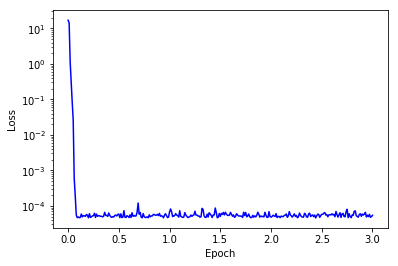

In [4]:
train(batch_size=1, lr=0.1, epochs=3, period=10)

Epoch : 0, lr : 0, Train loss : 0.00609.
W : [[ 2.04762292 -3.42867017]], b : [ 4.29388762].
Epoch : 1, lr : 0, Train loss : 0.00005.
W : [[ 1.99688554 -3.3984828 ]], b : [ 4.20001793].
Epoch : 2, lr : 0, Train loss : 0.00005.
W : [[ 2.000139   -3.39981198]], b : [ 4.20027208].


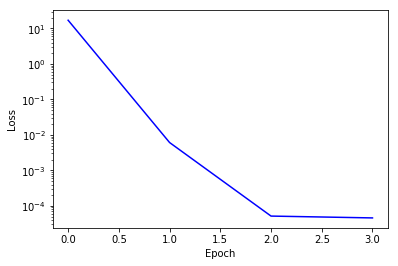

In [5]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)

Epoch : 0, lr : 0, Train loss : 0.00005.
W : [[ 2.00211477 -3.40103531]], b : [ 4.20133638].
Epoch : 1, lr : 0, Train loss : 0.00005.
W : [[ 1.99975622 -3.40137935]], b : [ 4.19817781].
Epoch : 2, lr : 0, Train loss : 0.00005.
W : [[ 1.99905753 -3.40126777]], b : [ 4.19974709].


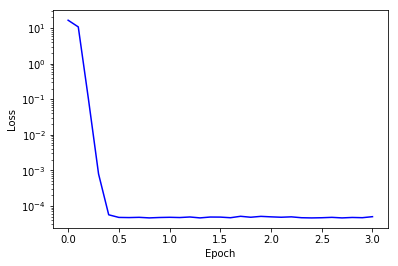

In [6]:
train(batch_size=10, lr=0.2, epochs=3, period=100)

Epoch : 0, lr : 5, Train loss : nan.
W : [[ nan  nan]], b : [ nan].
Epoch : 1, lr : 5, Train loss : nan.
W : [[ nan  nan]], b : [ nan].
Epoch : 2, lr : 5, Train loss : nan.
W : [[ nan  nan]], b : [ nan].


/home/liang/.virtualenvs/liang-jupyter/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


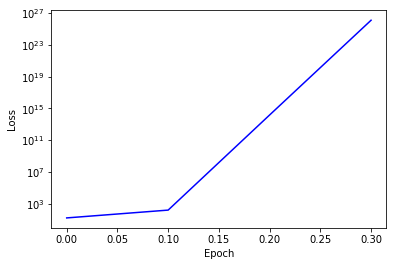

In [7]:
train(batch_size=10, lr=5, epochs=3, period=100)